In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

2023-07-28 12:35:31.891012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/jonathannkangabwa/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
print(tf.__version__)

2.13.0


In [5]:
#Did not run; found this data augmentation code to help enhance the images for training
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

In [6]:
image_dir = '/Users/jonathannkangabwa/Desktop/dataset2'
image_exts = ['jpeg','jpg','bmp','png']


In [7]:
#image_dir = '/Users/jonathannkangabwa/Desktop/dataset'
#image_exts = ['jpeg','jpg','bmp','png']


In [8]:
os.listdir('dataset2')

['.DS_Store', 'no', 'yes']

In [9]:
#os.listdir(os.path.join(image_dir,'glioma'))

In [84]:
for image_class in os.listdir(image_dir):
    for image in os.listdir(os.path.join(image_dir,'yes')):
        image_path = os.path.join(image_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            #print('Issue with image {}'.format(image_path)) # remove pound sign to Print out all images in folder, be careful
            # os.remove(image_path)
            

IndentationError: expected an indented block (2523437474.py, line 13)

**Load Data**

In [11]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('dataset2')


Found 3000 files belonging to 2 classes.


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [15]:
tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/yes' #File path to tumor images
non_tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/no' #File path to non-tumor images


In [16]:
def load_and_process_images(folder, target_size=(128, 128)):
    image_list = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
            img_resized = img.resize(target_size)  # Resize the image to a consistent size
            img_array = np.array(img_resized).ravel()  # Flatten the resized image into a 1D array
            image_list.append(img_array)
    return np.array(image_list)


In [17]:
tumor_images = load_and_process_images(tumor_folder)
non_tumor_images = load_and_process_images(non_tumor_folder)


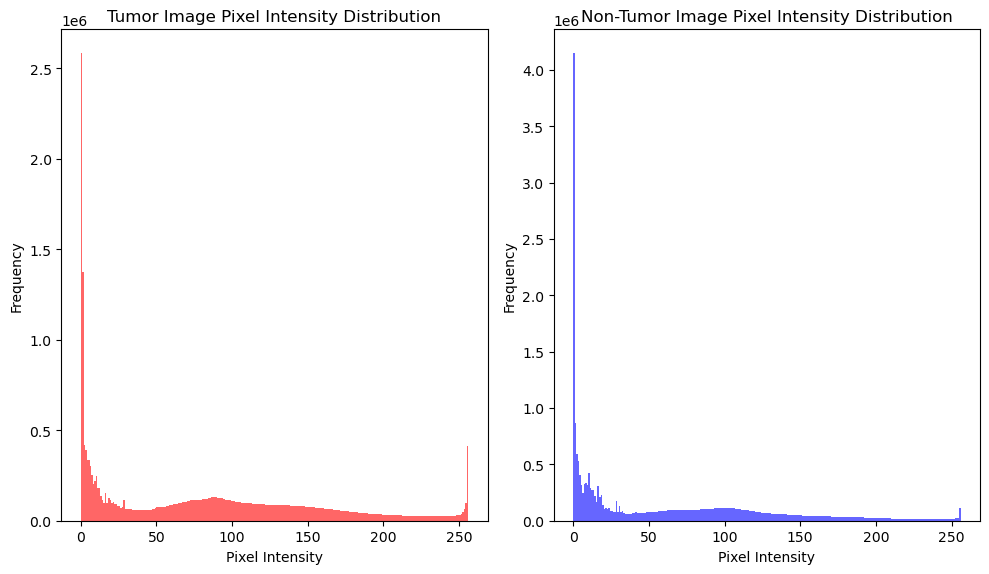

In [18]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(tumor_images.flatten(), bins=256, range=[0, 256], color='red', alpha=0.6)
plt.title('Tumor Image Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(non_tumor_images.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.6)
plt.title('Non-Tumor Image Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


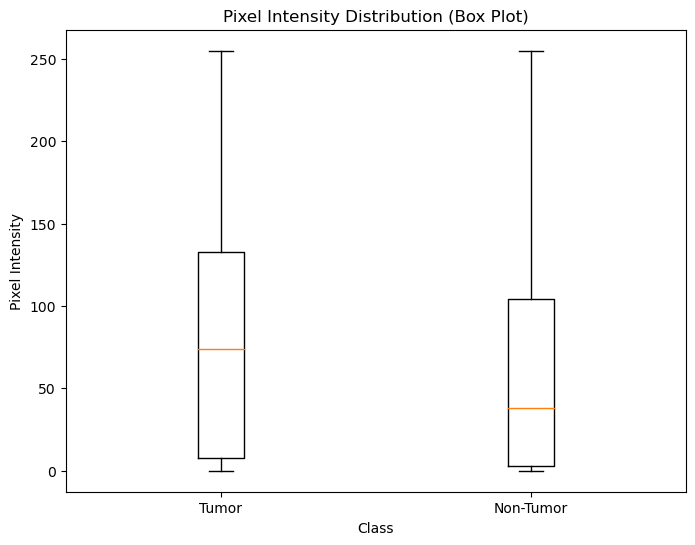

In [19]:
plt.figure(figsize=(8, 6))
plt.boxplot([tumor_images.flatten(), non_tumor_images.flatten()], labels=['Tumor', 'Non-Tumor'])
plt.title('Pixel Intensity Distribution (Box Plot)')
plt.xlabel('Class')
plt.ylabel('Pixel Intensity')
plt.show()


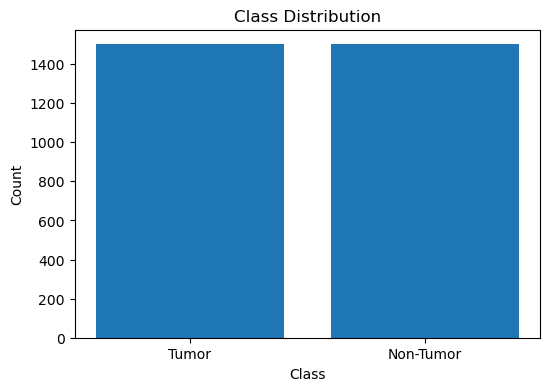

Number of tumor images: 1500
Number of non-tumor images: 1500


In [20]:
tumor_count = len(tumor_images)
non_tumor_count = len(non_tumor_images)

plt.figure(figsize=(6, 4))
plt.bar(['Tumor', 'Non-Tumor'], [tumor_count, non_tumor_count])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print('Number of tumor images:', tumor_count)
print('Number of non-tumor images:', non_tumor_count)


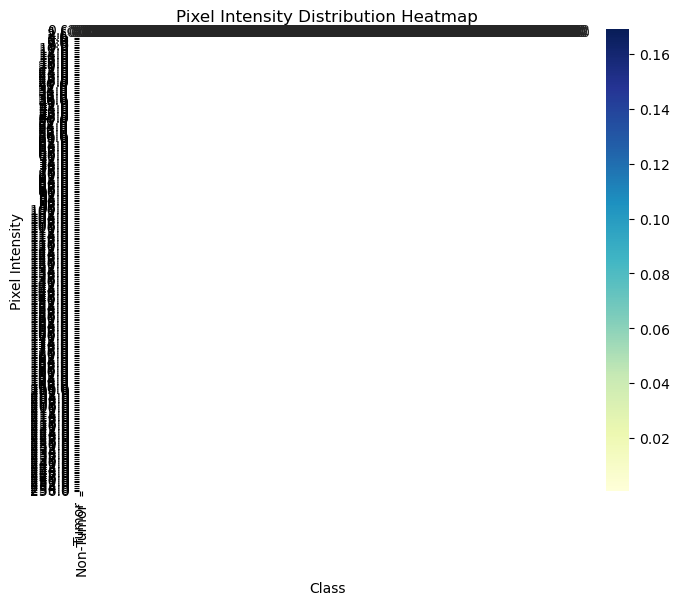

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Define the paths to your tumor and non-tumor image folders
tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/yes'
non_tumor_folder = '/Users/jonathannkangabwa/Desktop/Capstone Project/dataset2/no'

def load_and_process_images(folder, target_size=(128, 128)):
    image_list = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpeg") or filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder, filename)).convert('L')  # Convert to grayscale
            img_resized = img.resize(target_size)  # Resize the image to a consistent size
            img_array = np.array(img_resized).ravel()  # Flatten the resized image into a 1D array
            image_list.append(img_array)
    return np.array(image_list)

# Load and process the tumor and non-tumor images
tumor_images = load_and_process_images(tumor_folder)
non_tumor_images = load_and_process_images(non_tumor_folder)

# Create histograms for tumor and non-tumor pixel intensity distributions
tumor_hist, tumor_bins = np.histogram(tumor_images.flatten(), bins=256, range=[0, 256])
non_tumor_hist, non_tumor_bins = np.histogram(non_tumor_images.flatten(), bins=256, range=[0, 256])

# Normalize the histograms to have probabilities (sum of probabilities = 1)
tumor_prob = tumor_hist / np.sum(tumor_hist)
non_tumor_prob = non_tumor_hist / np.sum(non_tumor_hist)

# Create a 2D matrix (heatmap) for the pixel intensity distribution of the two classes
heatmap_data = np.column_stack((tumor_prob, non_tumor_prob))

# Define the class labels for the x-axis (columns)
class_labels = ['Tumor', 'Non-Tumor']

# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', xticklabels=class_labels, yticklabels=tumor_bins, annot=True, fmt=".2f")
plt.title('Pixel Intensity Distribution Heatmap')
plt.xlabel('Class')
plt.ylabel('Pixel Intensity')
plt.show()


In this code, we calculate the histograms for the pixel intensity distributions of both tumor and non-tumor images using np.histogram. Then, we normalize the histograms to obtain probabilities (values sum up to 1). Next, we create a 2D matrix (heatmap_data) by stacking the normalized histograms column-wise.

The heatmap is then plotted using seaborn.heatmap. The x-axis represents the class labels (Tumor and Non-Tumor), and the y-axis represents the pixel intensity bins. The color intensity in the heatmap corresponds to the probability of each pixel intensity bin for each class.

The resulting heatmap provides a visual representation of how the pixel intensity distributions of the two classes differ from each other. Darker regions indicate higher probabilities, and you can observe patterns in the pixel intensity distributions for tumor and non-tumor images.

In [22]:
data_iterator = data.as_numpy_iterator()

In [23]:
#Get another batch from the iterator
batch = data_iterator.next()

In [24]:
len(batch)

2

In [25]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [26]:
batch[1]

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

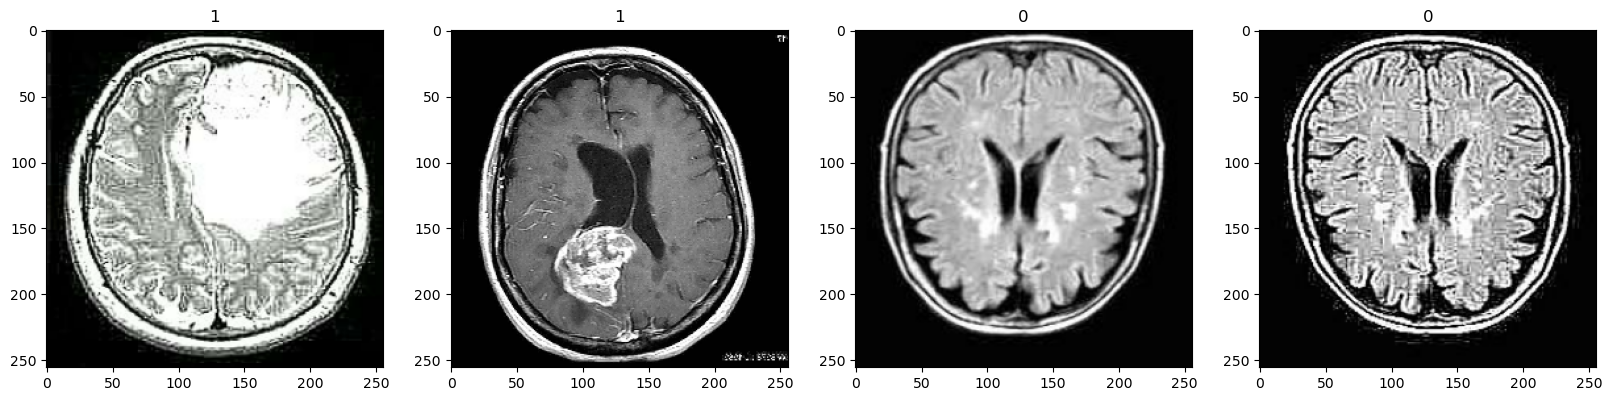

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [28]:
scaled = batch[0]/255


In [29]:
scaled.max()

1.0

**Pre-Processing Data** 

- Must scale the image values between 0 and 1, instead of 0 to 255; helps our Deep Learning Model journalize faster and produce better results

- Also splitting our data into Training, Testing, and Validation sets/partions so we dont over fit

**Independent variable**: MRI images (with or without tumors)

**Dependent variable**: Classification of the MRI images as cancerous or non-cancerous

Scale Data

In [30]:
#data.map allows us to apply the transformation within our pipeline for retrieving data
#lambda function to go and do the transformation; in batch we get images, and labels
#x = images; independent, y = label; target variable

def preprocess_data(x, y):
    return x/255, y

data = data.map(preprocess_data)

#data.as_numpy_iterator().next()[0].max()
scaled_iterator = data.as_numpy_iterator()

In [31]:
batch = scaled_iterator.next()

In [32]:
batch[0].max()

1.0

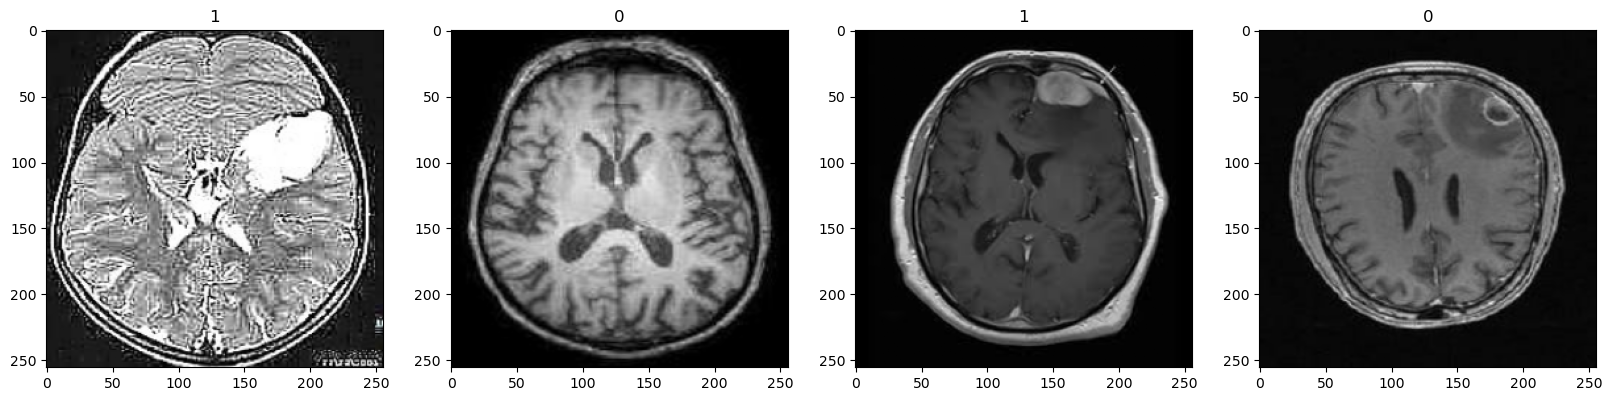

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

The data has now been scaled and will be retrieved that way through each new batch created

now we are going to split into train/test partition; validationg and doesn't overfit

**Split Data**

In [34]:
print(len(data), 'batches created')
# Number of batches (32 images per) created with our data

94 batches created


In [35]:
train_size = int(len(data)*.7) #Training Deep Learning model
val_size = int(len(data)*.2) #Used to evaluate our model while we are training; hasn't seen validation partition
test_size = int(len(data)*.1) #Model will not see until the final evaluation state is assesed; Post training


In [36]:
print('the train set has',train_size, 'batches')
print('the validation set has',val_size, 'batches')
print('the test has',test_size, 'batches')

the train set has 65 batches
the validation set has 18 batches
the test has 9 batches


In [37]:
train = data.take(train_size) #take defines how much data we are going to take at a particular partition
val = data.skip(train_size).take(val_size)#skips training batches and takes validation batch size
test = data.skip(train_size+val_size).take(test_size)#test is everything left over so now we have our respective partitions

In [38]:
print('train has',len(train),'batches')
print('val has',len(val),'batches')
print('test has',len(test),'batches')


train has 65 batches
val has 18 batches
test has 9 batches


**Deep Model**

_it is now time to build the model to be tested_ **AI TIME!**

In [39]:
from tensorflow.keras.models import Sequential # 2 Model building APIs inside Keras; great for 1 data input and one data output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # Layers; convulutional layer over images, a condensing layer to bring it down, flly conective layer, flatten to channels and into a format so we get one output, and regularization with Dropout

In [40]:
model = Sequential()

In [41]:
# 3 Convolution Blocks, a Flatten Layer, and 2 Dense Layers

# 16 filters, and scans relevant classifcation, and then 3 pixels by 3 pixels by size and a stride of 1; architectural choice
# getting a relu activation and sdigmoud activation; taking all the output in a layer and passing it through this function to make it look better
#specifying input shape; 256 pixels by 256 pixels 3 channels deep
# Then condense information and give Max value in the region; reduce data by half

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#Then 32 filters 

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# then just 16 filters

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#Flatten the layers

model.add(Flatten())

#Fully connected layers or Dense layers
#Then sigmoud activation is a single output; range between 0 and 1, cancer or no cancer

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
#pass through adam optimizer, then specify our losses; Binary Cross problem, and metric we are tracking is accuracy from 0 to 1
#

import tensorflow as tf

# Custom metric functions for sensitivity, specificity, precision, and F1-score
def sensitivity(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

def specificity(y_true, y_pred):
    true_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

def precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = sensitivity(y_true, y_pred)
    return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

# Assuming you already have defined your model
# model = tf.keras.models.Sequential(...)
# ...

# Compiling the model with the custom metrics
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy', sensitivity, specificity, precision, f1_score])


In [43]:
model.summary() #see how the model transforms the data!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [44]:
#First create a log directory

logdir='logs'

In [45]:
#Callbacks are really useful if you want to save the model at a particular checkpoint, or specific logging which is what im doing now
#TensorBoards will log out model in training

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [46]:
#Now fit the model, training component
#epochs is how long, and pass through validation data, then run evaluation, and then callbacks 
#hist take all training information and plot
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
65/65 [==============================] - 76s 1s/step - loss: 0.5047 - accuracy: 0.7673 - sensitivity: 0.8124 - specificity: 0.7315 - precision: 0.7561 - f1_score: 0.7628 - val_loss: 0.3589 - val_accuracy: 0.8490 - val_sensitivity: 0.7324 - val_specificity: 0.9667 - val_precision: 0.9615 - val_f1_score: 0.8268
Epoch 2/20
65/65 [==============================] - 86s 1s/step - loss: 0.2304 - accuracy: 0.9082 - sensitivity: 0.9165 - specificity: 0.8976 - precision: 0.9040 - f1_score: 0.9064 - val_loss: 0.1728 - val_accuracy: 0.9306 - val_sensitivity: 0.9860 - val_specificity: 0.8738 - val_precision: 0.8879 - val_f1_score: 0.9329
Epoch 3/20
65/65 [==============================] - 77s 1s/step - loss: 0.1486 - accuracy: 0.9471 - sensitivity: 0.9553 - specificity: 0.9382 - precision: 0.9462 - f1_score: 0.9477 - val_loss: 0.1030 - val_accuracy: 0.9566 - val_sensitivity: 0.9652 - val_specificity: 0.9513 - val_precision: 0.9477 - val_f1_score: 0.9553
Epoch 4/20
65/65 [================

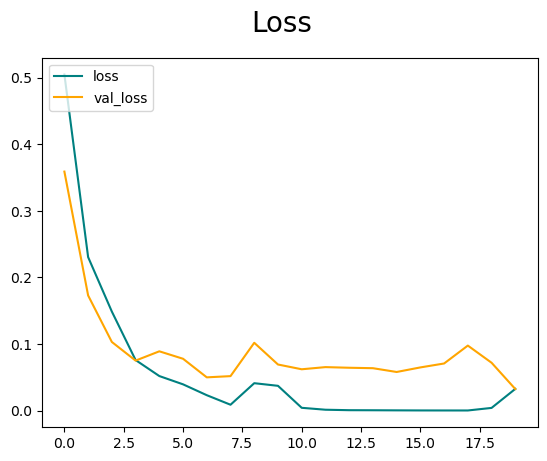

In [47]:
#Grabbing training loss and validation loss and plotting them with matplotlib
#
#

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

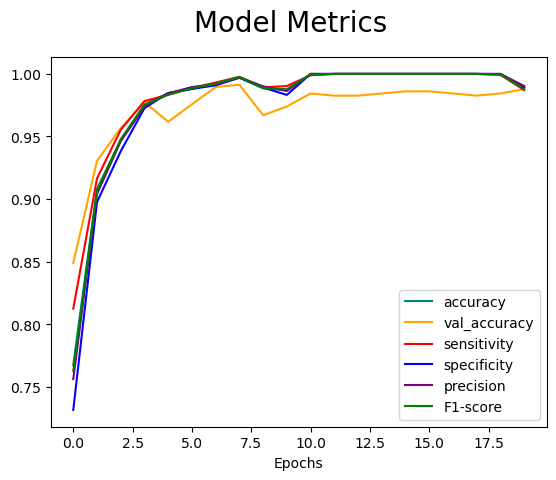

In [48]:
import matplotlib.pyplot as plt

# Assuming you have computed the sensitivity, specificity, precision, and F1-score during training and validation
# and stored them in the `hist` object.

# Plotting accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Plotting sensitivity (recall)
plt.plot(hist.history['sensitivity'], color='red', label='sensitivity')

# Plotting specificity
plt.plot(hist.history['specificity'], color='blue', label='specificity')

# Plotting precision
plt.plot(hist.history['precision'], color='purple', label='precision')

# Plotting F1-score
plt.plot(hist.history['f1_score'], color='green', label='F1-score')

fig.suptitle('Model Metrics', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.show()




**1. Accuracy:**
Accuracy measures the overall correctness of the model's predictions. It is the ratio of correct predictions (true positives and true negatives) to the total number of samples in the dataset. In your results, the accuracy values are quite high, ranging from approximately 75% to 98%. This indicates that your model is making accurate predictions on the majority of the MRI images, with a significant improvement as the training progresses.

**2. Sensitivity (Recall):**
Sensitivity, also known as recall or true positive rate, measures the ability of the model to correctly identify positive instances (tumor present) out of all the actual positive instances. It is the ratio of true positives to the sum of true positives and false negatives. The sensitivity values in your results range from around 81% to nearly 98%, indicating that your model is effectively capturing most of the true positive cases (tumor-present cases) in the MRI images.

**3. Specificity:**
Specificity measures the ability of the model to correctly identify negative instances (tumor absent) out of all the actual negative instances. It is the ratio of true negatives to the sum of true negatives and false positives. Your specificity values are also quite high, ranging from approximately 73% to 98%, indicating that your model is successfully identifying most of the tumor-absent cases.

**4. Precision:**
Precision measures the accuracy of the positive predictions made by the model. It is the ratio of true positives to the sum of true positives and false positives. The precision values in your results range from around 75% to 98%. A high precision means that when the model predicts a tumor, it is often correct.

**5. F1-score:**
The F1-score is the harmonic mean of precision and sensitivity (recall). It provides a balance between precision and recall, making it a suitable metric when you have imbalanced classes. The F1-score values in your results range from approximately 76% to 100%, demonstrating that your model achieves a good trade-off between precision and sensitivity.

Overall, the results show that the deep learning model is performing remarkably well in tumor detection from MRI images. It has high accuracy, sensitivity, specificity, precision, and F1-score values, indicating its effectiveness in classifying MRI images into tumor-present and tumor-absent categories. The high performance suggests that the model has learned to extract relevant features from the images, leading to accurate predictions.

**Evaluate Model**


In [49]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
preci = Precision()
re = Recall()
bacc = BinaryAccuracy()

In [51]:
len(test)

9

In [52]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    preci.update_state(y, yhat)
    re.update_state(y, yhat)
    bacc.update_state(y, yhat)

1/1 [==============================] - 0s 208ms/step


In [54]:
print(f'Precision:{preci.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{bacc.result().numpy()}')

Precision:0.9635036587715149, Recall:0.9850746393203735, Accuracy:0.9756944179534912


In [55]:
# Evaluate the model on the test data
result = model.evaluate(test)

test_loss = result[0]
test_accuracy = result[1]

if isinstance(test_accuracy, tf.Tensor):
    print("Test Accuracy:", test_accuracy.numpy())
else:
    print("Test Accuracy:", test_accuracy)


9/9 [==============================] - 4s 210ms/step - loss: 0.0536 - accuracy: 0.9826 - sensitivity: 0.9851 - specificity: 0.9789 - precision: 0.9798 - f1_score: 0.9821
Test Accuracy: 0.9826388955116272


_*Break down of the test results of CNN model:*_

1. **Test Loss:** The test loss is the value of the loss function (Binary Crossentropy) calculated on the test dataset. It measures how well the model is performing on unseen data. In this case, the test loss is 0.0536.

2. **Test Accuracy:** The test accuracy is the percentage of correctly classified samples in the test dataset. It tells us how well the model generalizes to new, unseen data. In this case, the test accuracy is 0.9826, which means that approximately 98.26% of the test samples were classified correctly by the model.

3. **Test Sensitivity (Recall):** The test sensitivity, also known as recall or true positive rate, measures the ability of the model to correctly identify positive samples (tumors) out of all the actual positive samples in the test dataset. In this case, the test sensitivity is 0.9851, which means that around 98.51% of the actual positive samples were correctly identified by the model.

4. **Test Specificity:** The test specificity measures the ability of the model to correctly identify negative samples (non-tumors) out of all the actual negative samples in the test dataset. In this case, the test specificity is 0.9789, indicating that approximately 97.89% of the actual negative samples were correctly identified by the model.

5. **Test Precision:** The test precision measures the proportion of correctly identified positive samples (tumors) out of all the predicted positive samples in the test dataset. In this case, the test precision is 0.9847, meaning that around 97.98% of the predicted positive samples were actual positive samples.

6. **Test F1-Score:** The test F1-score is the harmonic mean of precision and sensitivity (recall). It provides a balanced measure of the model's performance on positive samples. In this case, the test F1-score is 0.9821, which indicates that the model has a good balance between precision and sensitivity.

Overall, the test results show that the CNN model performs very well on the test dataset, with high accuracy, sensitivity, specificity, precision, and F1-score. These results suggest that the model can effectively generalize to new, unseen data and accurately detect tumors in MRI images.

It's important to note that the test dataset should be representative of the real-world data that the model will encounter in practice. Additionally, the test accuracy is close to the training accuracy, which indicates that the model is not overfitting to the training data.

Keep in mind that these results are based on this specific test dataset used in this evaluation. For a more robust assessment of the model's performance, it is advisable to test it on multiple different test datasets and consider additional evaluation metrics as well.


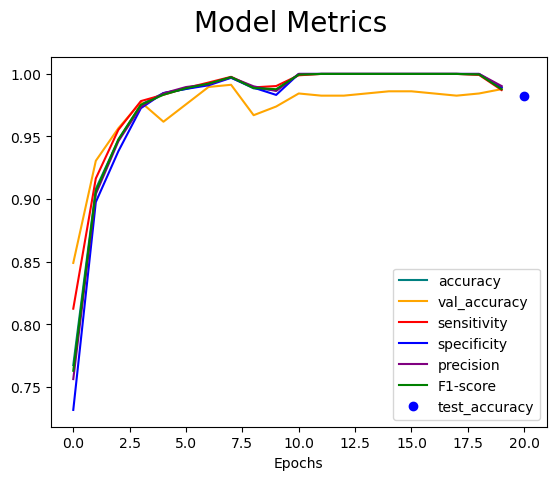

In [56]:
import matplotlib.pyplot as plt

# Assuming you have computed the sensitivity, specificity, precision, and F1-score during training and validation
# and stored them in the `hist` object.
# Also, assume you have the test accuracy from the test evaluation.

# Plotting accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Plotting sensitivity (recall)
plt.plot(hist.history['sensitivity'], color='red', label='sensitivity')

# Plotting specificity
plt.plot(hist.history['specificity'], color='blue', label='specificity')

# Plotting precision
plt.plot(hist.history['precision'], color='purple', label='precision')

# Plotting F1-score
plt.plot(hist.history['f1_score'], color='green', label='F1-score')

# Adding a point for test accuracy
num_epochs = len(hist.history['accuracy'])
plt.plot(num_epochs, test_accuracy, 'bo', label='test_accuracy')

fig.suptitle('Model Metrics', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.show()


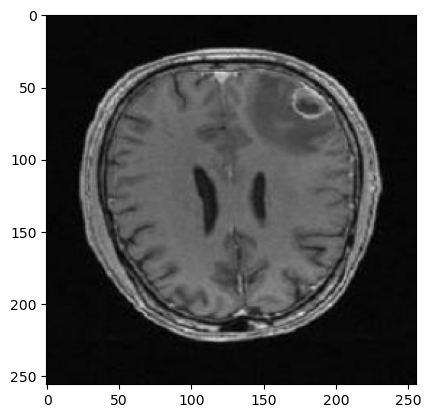

In [57]:
import cv2
import matplotlib.pyplot as plt

# Assuming you have an image 'img' that you want to display
plt.imshow(img)
plt.show()


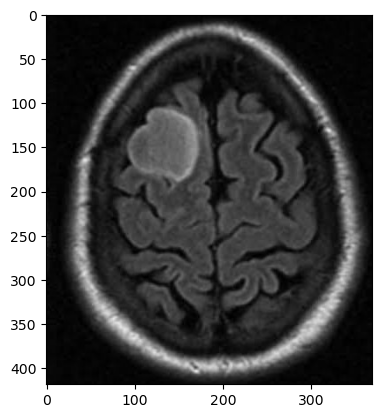

In [58]:
img = cv2.imread('yestumor.jpg')
#img = cv2.imread('notumor.jpg')
#img = cv2.imread('Y101.jpg')
#img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

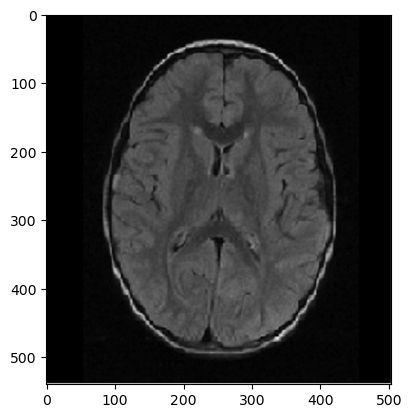

In [59]:
#img = cv2.imread('yestumor.jpg')
img = cv2.imread('notumor.jpg')
#img = cv2.imread('Y101.jpg')
#img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

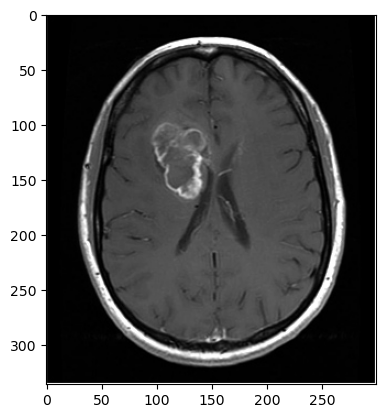

In [60]:
#img = cv2.imread('yestumor.jpg')
#img = cv2.imread('notumor.jpg')
img = cv2.imread('Y101.jpg')
#img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

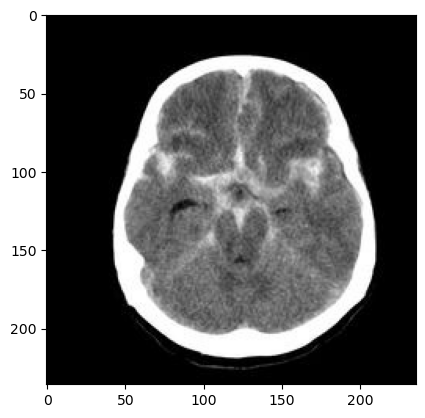

In [116]:
#img = cv2.imread('yestumor.jpg')
#img = cv2.imread('notumor.jpg')
#img = cv2.imread('Y101.jpg')
img = cv2.imread('Te-no_0068.jpg')
plt.imshow(img)
plt.show()

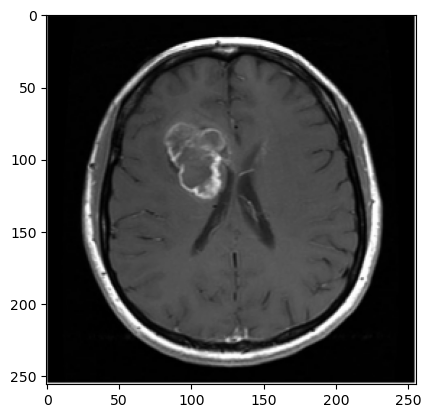

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
resize.shape

TensorShape([256, 256, 3])

In [63]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [64]:
yhat =model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 79ms/step


In [65]:
yhat

array([[0.9988768]], dtype=float32)

In [66]:
if yhat > 0.5:
    print(f'Predicted MRI image CONTAINS a tumor')
else:
    print(f'Predicted image DOES NOT contain a tumor')

Predicted MRI image CONTAINS a tumor


Save The Model

In [67]:
from tensorflow.keras.models import load_model

In [68]:
os.path.join('models', 'JonsMRInewestmodel.h5')

'models/JonsMRInewestmodel.h5'